# **Music Recommendation System**

# **Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

In [191]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

## **Load the dataset**

In [195]:
# Load the dataset you have saved at the end of milestone 1
df_final = pd.read_csv('/content/drive/MyDrive/df_final.csv')

In [194]:
df_final.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
1,202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
2,203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
3,204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
4,205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [196]:
# Drop the column 'Unnamed: 0'
df_final.drop(['Unnamed: 0'], axis =1, inplace = True)
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [198]:
df_final['play_count'].value_counts()

1    72473
2    23890
3    10774
4     5874
5     4865
Name: play_count, dtype: int64

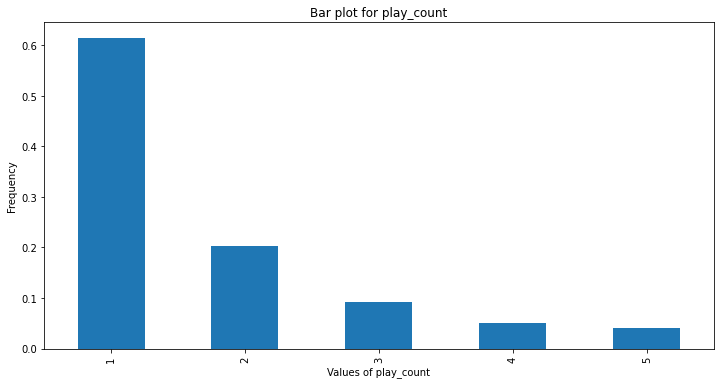

In [203]:
# Create the bar plot and provide observations
plt.figure(figsize = (12, 6))

df_final['play_count'].value_counts(1).plot(kind = 'bar')

# Add title and axis names
plt.title('Bar plot for play_count')
plt.xlabel('Values of play_count')
plt.ylabel('Frequency')

plt.show()

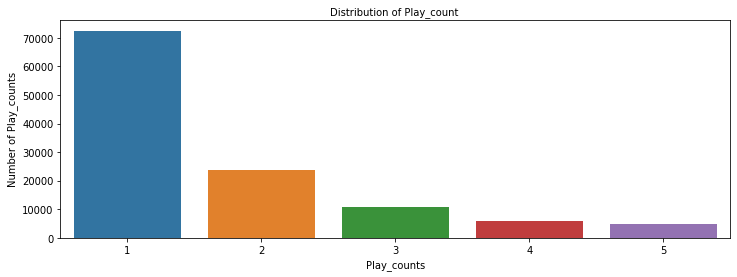

In [208]:
# Distribution of ratings
plt.figure(figsize = (12, 4))
sns.countplot(x="play_count", data=df_final)

plt.tick_params(labelsize = 10)
plt.title("Distribution of Play_count ", fontsize = 10)
plt.xlabel("Play_counts", fontsize = 10)
plt.ylabel("Number of Play_counts", fontsize = 10)
plt.show()

### **Model 1**

### **Popularity-Based Recommendation Systems**

- Rank-based recommendation systems provide recommendations based on the most popular items (songs). This kind of recommendation system is useful when we have cold start problems. Cold start refers to the issue when we get a new user into the system and the machine is not able to recommend song to the new user, as the user did not have any historical interactions in the dataset. In those cases, we can use **rank-based recommendation system** to recommend song to the new user.

- To build the **rank-based recommendation system**, we take average of all the ratings/play_count provided to each song and then rank them based on their average rating / play_count.

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [7]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']        # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']        # Hint: Use groupby function on the song_id column

In [188]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [204]:
# Create the bar plot and provide observations
#plt.figure(figsize = (12, 6))
#final_play['avg_count'].value_counts(1).plot(kind = 'bar')
#plt.show()

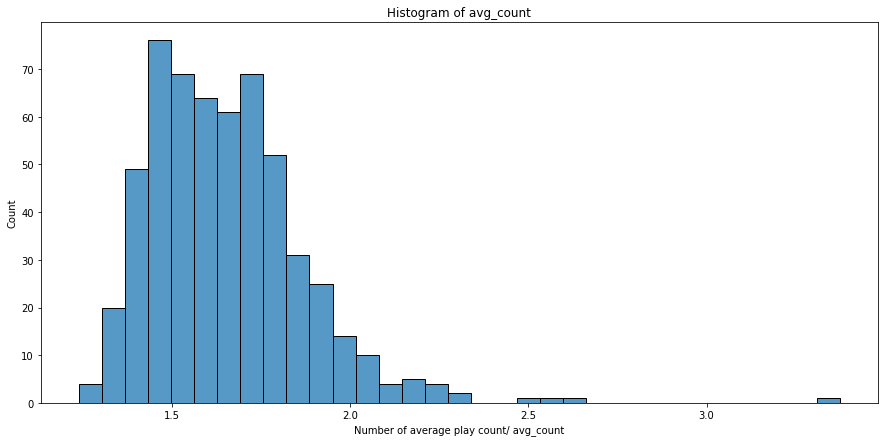

In [205]:
# Plotting user-item interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(final_play['avg_count'])

plt.title('Histogram of avg_count')
plt.xlabel('Number of average play count / avg_count')

plt.show()

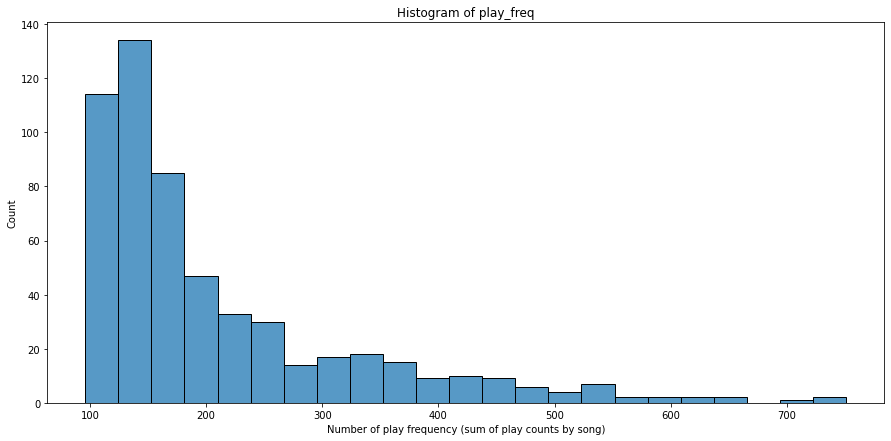

In [209]:
# Plotting user-item interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(final_play['play_freq'])

plt.xlabel('Number of play frequency (sum of play counts by song)')

plt.title('Histogram of play_freq')

plt.show()

Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [16]:
# Build the function to find top n songs

def top_n_products(final_play, n, min_interaction):
    
    # Finding songs with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > min_interaction]
    
    # Sorting values with respect to average rating 
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

In [17]:
# Recommend top 10 songs using the function defined above with min 50 interactions (number of playcounts for a song)

list(top_n_products(final_play, 10, 50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

In [210]:
list_top10= list(top_n_products(final_play, 10, 50))
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["song_id"].isin(list_top10)].drop_duplicates()

,song_id,title,release,artist_name,year
141,2220,Sehr kosmisch,Musik von Harmonia,Harmonia,0
494,657,Luvstruck,Hard House Anthems,Southside Spinners,1999
749,5531,Secrets,Waking Up,OneRepublic,2009
751,5653,Transparency,Workout Holiday,White Denim,2008
976,9942,Greece 2000,Greece 2000,Three Drives,1997
1222,614,You're The One,If There Was A Way,Dwight Yoakam,1990
1839,6450,Brave The Elements,Brave The Elements - EP,Colossal,0
1850,7224,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
1864,8324,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009
2516,8483,Video Killed The Radio Star,Friends Reunited: Music Of The Year 1979,The Buggles,1979


Recommend top 10 songs using the function defined above with min 50 interactions (number of playcounts for a song):
 - 7224	"Victoria (LP Version)"	Hit By A Train: The Best Of Old 97's	by Old 97's	from 2006
 - 8324	"The Big Gundown"	Invaders Must Die Remixes and Bonus Tracks by	The Prodigy	from 2009
 - 6450	"Brave The Elements"	Brave The Elements - EP	 by Colossal	0
 - 9942	"Greece 2000"	Greece 2000	by Three Drives	from 1997
 - 5531	"Secrets"	Waking Up	by OneRepublic	from 2009
 - 5653	"Transparency"	Workout Holiday	by White Denim	from 2008
 - 8483	"Video Killed The Radio Star"	Friends Reunited: Music Of The Year 1979	by The Buggles from	1979
 - 2220	"Sehr kosmisch"	Musik von Harmonia	by Harmonia	0
 - 657	"Luvstruck"	Hard House Anthems	by Southside Spinners	from 1999
 - 614	"You're The One"	If There Was A Way by	Dwight Yoakam	from 1990

### **Model 2**

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [15]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366430 sha256=8c88d69af234e9c93aefb6afea6e35974d934f1574179f3fee7cc99415f5e97a
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [18]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

- RMSE, Precision@k, Recall@ k, and F1-score@k 
- Precision or Recall? 
- Precision **fraction of recommended items that are relevant actually** (how many of those recommended were correct/relevant) 
- Recall **fraction of actually relevant items that are recommended to the user** (how many of correct/relevant were recommneded)? How many did we miss?

In [19]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

- Changing the treshold will def change the values of precision and recall (usually one will go down while the other one will go up).
- Depending on which accuracy measure we're interested in (precision **or** recall), we can adjust our treshold.

- The intuition behind the treshold 1.5 is that songs with average count below it won't be recommended to the user and songs with an average count above it, (for a given user) should be recommended to those users:
  -- if a user listens to the song more than 1.5 times on average, he/she will listen to the similar song with the same rating.

- We can see from the histogram of the avg_count that this is where the values are concentrated (most songs have average count close to 1.5 on average).


In [20]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale= (0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

- Changing test size might influence test results and output.
- If our test size is too small, there might be not enouh data to build a model (accuracy measures for both train and test data sets would be weak (higher RMSE and low Precision, Recall and F1 score)), the model can underfit, if the train size is too big (let's say 95%) then the model can be overfitted and won't predict new values correctly (would have great RMSE, Precision and Recall, F1 score on thet raining set but not so great on the test set).


In [21]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
- Hard to compare RMSE since it's our 1st model with it.
-Precision is much lower than recall, 0.4 vs 0.69, which means that out of 10 recommended songs only 4 were relevant and out of 10 relevant songs, only 7 were recommended, which means for every 10 recommended songs, 6 weren't relevant -> high cost.
- We're recommended many songs that aren't relevant ( 60% = 100% - 40%), but we're doing better job at catching the songs that are relevant (70%).


In [22]:
##MW: Additional code - checking different tresholds

In [20]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k = 30, threshold = 1.2) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.386
Recall:  0.885
F_1 score:  0.538


In [66]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k = 30, threshold = 0.8) # Use sim_user_user model

RMSE: 1.0878
Precision:  1.0
Recall:  0.974
F_1 score:  0.987


In [69]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k = 30, threshold = 0.7) # Use sim_user_user model

RMSE: 1.0878
Precision:  1.0
Recall:  0.974
F_1 score:  0.987


In [72]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k = 30, threshold = 0.5) # Use sim_user_user model

RMSE: 1.0878
Precision:  1.0
Recall:  0.974
F_1 score:  0.987


In [23]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k = 30, threshold = 1.35) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.39
Recall:  0.823
F_1 score:  0.529


In [21]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k = 30, threshold = 1.7) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.436
F_1 score:  0.415


In [22]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k = 30, threshold = 2) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.291
Recall:  0.126
F_1 score:  0.176


In [23]:
# MW: Modifying function precision_recall_at_k to use it later to plot precision and recall for different values of treshold

def precision_recall_at_k_MW(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    #accuracy.rmse(predictions)

    # Command to print the overall precision
    #print('Precision: ', precision)

    # Command to print the overall recall
    #print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    #print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

    return( precision, recall, round((2 * precision * recall) / (precision + recall), 3) )

In [24]:
# import extra libraries

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pr_all = precision_recall_at_k_MW(sim_user_user, k = 30, threshold = 0)[0]
#rc_all = precision_recall_at_k_MW(sim_user_user, k = 30, threshold = 0)[1]

#x = np.arange(0, 5,step)
#step = 1
#for i in np.arange(step ,5,step):
#  pr = precision_recall_at_k_MW(sim_user_user, k = 30, threshold = i)[0]
#  rc = precision_recall_at_k_MW(sim_user_user, k = 30, threshold = i)[1] 

#  pr_all = np.append(pr_all, pr)
#  rc_all = np.append(rc_all, rc)


#y1 = pr_all
#y2 = rc_all

#plt.plot(x, y1, label ='precision')
#plt.plot(x, y2, '-.', label ='recall')

#plt.xlabel("treshold")
#plt.ylabel("recision/ Recall")
#plt.legend()
#plt.title('Precision & Recall for different Treshold')
#plt.show()



In [25]:
# MW  This funcion plots precision and recall for a specific model and different k, for a specific step depending on the treshold
# The goal is to find the optimum treshold
def plot_precision_recall_at_k_MW(model, step = 0.5, k = 30, tr_min = 0, tr_max = 5):

  pr_all = precision_recall_at_k_MW(model, k = 30, threshold = tr_min)[0]
  rc_all = precision_recall_at_k_MW(model, k = 30, threshold = tr_min)[1]

  x = np.arange(tr_min, tr_max, step)
  
  for i in np.arange(step, tr_max, step):
    pr = precision_recall_at_k_MW(model, k = 30, threshold = i)[0]
    rc = precision_recall_at_k_MW(model, k = 30, threshold = i)[1] 

    pr_all = np.append(pr_all, pr)
    rc_all = np.append(rc_all, rc)


  y1 = pr_all
  y2 = rc_all

  plt.plot(x, y1, label ='Precision')
  plt.plot(x, y2, '-.', label ='Recall')

  plt.xlabel("Treshold")
  plt.ylabel("Rrecision/ Recall")
  plt.legend()
  plt.title('Precision & Recall for different Treshold')
  plt.show()

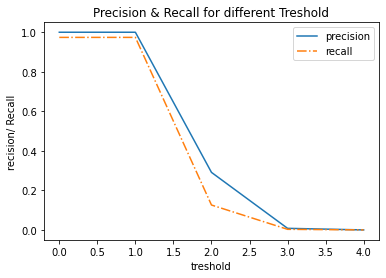

In [65]:
plot_precision_recall_at_k_MW(sim_user_user, step = 1)


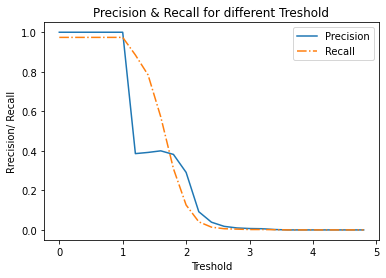

In [71]:
plot_precision_recall_at_k_MW(sim_user_user, step = 0.2)

In [81]:
#df_final.head()

In [82]:
#df_final[df_final['song_id']==21].user_id.unique()

In [83]:
#MW: Checking play count for id 6958 and song_id 1671 
#df_final[(df_final['user_id']==6958) & (df_final['song_id']==1671)]

In [26]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [28]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

In [212]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(27018, 1671, verbose = True) # Use user_id 27018 and song_id 1671

user: 27018      item: 1671       r_ui = None   est = 1.28   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=1.2752357942102888, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- We're predicting play_count for a song that has been played and for a one that hasn't.
- Prediction for a song that actually has been played is pretty close to the actual value (1.8 predicted vs 2 actual value).
- Prediction for new song is 1.63, which is lower than previous song but still above treshold (1.63 >1.5) which means this song would be most likely recommended to a given user.

Now, let's try to tune the model and see if we can improve the model performance.

In [76]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0462971011577167
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [29]:
# Train the best model found in above gridsearch

# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**

- We can see that tuning the model (hyper parameters tuning) helped improve model a little bit.
- RMSE we down from 1.087 to 1.053, which indicates that the optimized model might be better (might predict better).
- Precision, recall and F1 score all went up, however we still have much lower Precision than Recall (0.4 and 0.7 respectivelly).
-Hence, we can say that the model performance has improved slightly after hyperparameter tuning.


-An idea for this model would we to adjust the teshold and see what values would be get for a precion and recall.

In [30]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [31]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

In [213]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user_optimized.predict(27018, 1671, verbose = True) # Use user_id 27018 and song_id 1671

user: 27018      item: 1671       r_ui = None   est = 1.29   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=1.2858125113809453, details={'actual_k': 18, 'was_impossible': False})

**Observations and Insights:**

- Predicted value for know output is closer to the actual value (1.96 vs. 1.8 for th actual value 2)
- Predicted value for the uknows output is 1.45 which is > 1.5 (treshold) so in this case, the song wouldn't be recommended to the user.


**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [32]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [33]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [34]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine

recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)


In [35]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


In [36]:
sid = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])['song_id']

In [37]:
sid

0    5531
1     317
2    4954
3    8635
4    5943
Name: song_id, dtype: int64

In [101]:
# df_final.head()

In [38]:
sid = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])['song_id']
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["song_id"].isin(sid)].drop_duplicates()

,song_id,title,release,artist_name,year
72,4954,The Maestro,Check Your Head,Beastie Boys,1992
253,5943,You've Got The Love,Lungs,Florence + The Machine,2009
303,317,Undo,Vespertine Live,Björk,2001
749,5531,Secrets,Waking Up,OneRepublic,2009
3302,8635,Una Confusion,All Access,LU,2006


**Observations and Insights:**

 - 5 most recommended songs to the user number 6958 (based on user-user similarity based collaborative filtering) with corrected ratings:
  - 2.51 - 5531	 "Secrets" 	Waking Up by OneRepublic from	2009
  - 2.47 - 317	 "Undo" 	Vespertine Live	by Björk from	2001
  - 2.34 - 4954	 "The Maestro"	 Check Your Head	by Beastie Boys	from 1992
  - 2.33 - 8635	 "Una Confusion" 	All Access	by LU	from 2006
  - 2.33 -5943  "You've Got The Love"	 Lungs	by Florence + The Machine	from 2009

 All the ratings (average count) for those songs are above 2.39 (before correction).


### Correcting the play_counts and Ranking the above songs

In [70]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs =  ranked_songs.sort_values('corrected_ratings', ascending = False)
  
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

- While comparing the ratings of two products (in our case avg_count of two songs), it is not only the **ratings** (avg_count) that describe the **likelihood of the user to that product** (listener to the song). Along with the rating (avg_count), the **number of users who have seen that product** (listened to the song) also becomes important to consider (play_freq - how many times a song has been played). Due to this, we have calculated the **"corrected_ratings"** for each product (song). Commonly higher the **"rating_count" (play_freq) of a product (song) ) more it is liked by users**. 

  To interpret the above concept, a **product rated 4 (song with avg_count 4) with rating_count (play_freq) 3 is less liked in comparison to a product rated 3 with a rating count (play_freq) of 50**. 
  
  It has been **empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the rating_count of the product**.

- Note: In the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some products (songs) with ratings (avg_count) 5 and we can't have a rating more than 5 for a product (song).

In [104]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


**Observations and Insights:**
- Corrected ratings are lower than originally predicted_ratings which makes sense since we **substracted** quantity **1/np.sqrt(n)** where **n** is **play_freq**. 

## **Model 3**

### Item Item Similarity-based collaborative filtering recommendation systems 

In [49]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

- RMSE of this model is lower than previously seen models.
- Precision, Recall and F1 score are also lower which is very counter - intuitive.
- Can't tell if this model performs better or worse than the previous ones.
- Lower RMSE would indicate better model but also lower Precision nd Recall indicate worse model.



In [50]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [211]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

In [214]:
# Predicting play count for a sample user_id 27018 with song_id 1671 which is not heard by the user
sim_item_item.predict(27018, 1671, verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.5507234733908, details={'actual_k': 40, 'was_impossible': False})

In [51]:
df_final[(df_final.user_id == 6958) & (df_final.song_id == 1671)]

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
8,215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [40]:

# df_final[df_final.song_id != 1671].user_id.unique()

In [52]:
df_final[df_final.user_id == 6958].song_id.unique()

array([ 447,  512,  549,  703,  719,  892, 1050, 1480, 1671, 1752, 1756,
       1787, 1818, 2107, 2289, 2304, 2425, 2501, 2701, 2898, 2994, 3074,
       3491, 3551, 3718, 3801, 3907, 5193, 5340, 5441, 5566, 5894, 6305,
       7738, 8029, 8037, 8425, 9065, 9351])

In [42]:
#df_final[df_final.song_id == 1671].user_id.unique()

In [44]:
# users who listened to the song 1671
sid1671 = df_final[df_final.song_id == 1671].user_id.unique()

In [45]:
# list of sers who hasn't listened to the song with song_id 1671
df_final[np.isin(df_final['user_id'], sid1671, invert=True)].user_id.unique()

array([27018, 55837, 56576, ..., 12960, 71830, 47786])

In [47]:

# Checking if the user  really didn't listen to the song 1671
df_final[(df_final.user_id == 27018) & (df_final.song_id == 1671)]

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year


In [53]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(27018, 1671, verbose = True)



user: 27018      item: 1671       r_ui = None   est = 2.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.5507234733908, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

- Prediction for the user who already listened to the song (2 times) is 1.36 which is really far from 2 ( and wouldn't pass the treshold 1.5)

- Prediciton for a new user who hasn;t listened to the same song is 2.55 which is well above treshold so the song would be def recommended to this user.



In [56]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'msd', 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0259189425172777
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [57]:
# Apply the best modle found in the grid search

sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

**Observations and Insights:**

- We can observe that after tuning hyperparameters, **F_1 score of the model is better than the baseline model** (0.397 for baseline model to 0.506 for optimized model).
- Along with this, **the RMSE of the model has gone down in comparison to the model with default hyperparameters** ( from 1.0394 for baseline model to 1.032 for optimized model).
- **Precision** also went up (from 0.307 to 0.408).
- **Recall** has also improved (from 0.562 to 0.665).
- Hence, we can say that the model performance has improved after hyperparameter tuning.

- Still, Precision is much lower than Recall, which means we're good at identifying relevant songs but we're recommending songs that aren't relevant.

In [58]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [59]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, r_ui = 2, verbose = True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

In [215]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item_optimized.predict(27018, 1671, verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.34   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.337031090306491, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

- Predicted play count for a user who listened to the song is 1.96 which is very close to the actual value 2.

- Predicted play count for a song that user hasn't listened to is 1.2 < 1.5 which means that this song wouldn't be recommended to this user considering treshold of 1.5.

In [60]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [65]:
# More info about the most similar items to the item with inner id 0
# iipn - item-item-optimized-neighbour
iipn = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])['song_id']
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["song_id"].isin(iipn)].drop_duplicates()

,song_id,title,release,artist_name,year
41,139,I Got Mine,Attack & Release,The Black Keys,2008
279,8099,Toxic,The Singles Collection,Britney Spears,2003
463,7519,A Dustland Fairytale,Day & Age,The Killers,2008
483,5101,White Sky,Contra,Vampire Weekend,2010
1393,2342,Alaska,If Looks Could Kill,Camera Obscura,0


In [66]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [67]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [73]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


In [72]:
sid2 = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])['song_id']
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["song_id"].isin(sid2)].drop_duplicates()

,song_id,title,release,artist_name,year
41,139,I Got Mine,Attack & Release,The Black Keys,2008
279,8099,Toxic,The Singles Collection,Britney Spears,2003
463,7519,A Dustland Fairytale,Day & Age,The Killers,2008
483,5101,White Sky,Contra,Vampire Weekend,2010
1393,2342,Alaska,If Looks Could Kill,Camera Obscura,0


**Observations and Insights:**

- Just like in the previous model, in the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some products (songs) with ratings (avg_count) 5 and we can't have a rating more than 5 for a product (song).

- This time our 5 recommended song ot the user 6958 are (according to the recommendation predicted and corrected ratings):
    - 2.56 - 2342	"Alaska"	If Looks Could by Kill	Camera Obscura (no info about the year)
    - 2.30 - 5101	"White Sky"	Contra	by Vampire Weekend from	2010
    - 2.22 - 139	 "I Got Mine"	Attack & Release	by The Black Keys	from 2008
    - 2.19 - 7519	"A Dustland Fairytale"	Day & Age	by The Killers from	2008
    - 2.15 - 8099	"Toxic"	The Singles Collection	byBritney Spears from	2003


- As we can notice, those songs are different than songs recommended by the user-user similarity based collaborative filtering optimized model in the previous section.







## **Model 4** 

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [74]:
# Build baseline model using svd

# Using SVD matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [75]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [77]:
df_final[df_final.song_id != 3232].user_id.unique()

array([ 6958, 27018, 55837, ..., 12960, 71830, 47786])

In [117]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

In [217]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
svd.predict(27018, 1671, verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.22   {'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.217277598587248, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [78]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0126951881029147
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [80]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)


RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

- This model has the best (lowest) RMSE and the best (highest) Precision from all the models we investigated so far.
 
- Recall (abd F1 score) are also good.


- This could be the best model for the given problem and the dataset.
 

In [83]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [84]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

In [216]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
svd_optimized.predict(27018, 1671, verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.26   {'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.2636105990419964, details={'was_impossible': False})

**Observations and Insights:**

 - Recommendation for a user who already lsiten to the song is 1.34 which is pretty far away from the actual value 2.

 - Recommendation for a song the user haven't listened to yet is 1.44 which is < 1.5 so this song wouldn't be recommended to the given user.
  

In [85]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [87]:
# Ranking songs based on above recommendations

ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


In [89]:
pd.DataFrame(svd_recommendations, columns = ['song_id', 'predicted_ratings'])['song_id']

0    7224
1    5653
2    8324
3    6450
4    9942
Name: song_id, dtype: int64

In [90]:
svd_sid = pd.DataFrame(svd_recommendations, columns = ['song_id', 'predicted_ratings'])['song_id']
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["song_id"].isin(svd_sid)].drop_duplicates()

,song_id,title,release,artist_name,year
751,5653,Transparency,Workout Holiday,White Denim,2008
976,9942,Greece 2000,Greece 2000,Three Drives,1997
1839,6450,Brave The Elements,Brave The Elements - EP,Colossal,0
1850,7224,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
1864,8324,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009


**Observations and Insights:**
- This time our 5 recommended songs to the user 6958 are (using Matrix Factorization models) with their orrected ratings:

  - 2.50 - 7224	"Victoria (LP Version)"	Hit By A Train: The Best Of Old 97's	by Old 97's	from 2006
  - 2.01 - 5653	"Transparency"	Workout Holiday	 by White Denim	from 2008
  -  1.91 - 8324	"The Big Gundown"	Invaders Must Die Remixes and Bonus Tracks	by The Prodigy	from 2009
  - 1.86 - 9942	"Greece 2000"	Greece 2000	by Three Drives	from 1997
  - 1.85 - 6450	"Brave The Elements"	Brave The Elements - EP	 byColossal	no year info


-  Corrected ratings vary from 2.5 to 1.8 (so much lower than in previous models)

- Recommended songs are different than previously recommneded songs (in user-user and item-item smilarity based collaborative filtering methods).

## **Model 5**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [92]:
# Make baseline clustering model

# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [93]:
# df_final['play_count'].max()

In [99]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [95]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

In [219]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
clust_baseline.predict(27018, 1671, verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.40   {'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.402515809069641, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [100]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0615768553131015
{'n_cltr_u': 5, 'n_cltr_i': 6, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [97]:
# Train the tuned Coclustering algorithm

# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 6, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0691
Precision:  0.398
Recall:  0.56
F_1 score:  0.465


In [133]:
### MW what if we try different parameters?
# Set the parameter space to tune
param_grid2 = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-Fold gridsearch cross-validation
gs2 = GridSearchCV(CoClustering, param_grid2, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs2.fit(data)

# Printing the best RMSE score
print(gs2.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs2.best_params['rmse'])


1.046118990293955
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 30}


In [101]:
### MW what if we try different parameters?
# Train the tuned Coclustering algorithm

# Using tuned Coclustering algorithm
clust_tuned2 = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned2.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned2)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

- I expended hyperparametrs tuning for more then just given in orignal notebook and obtained better results.
- Tuned cluster model has RMSE of 1.049, Precision of 0.4, Recall is 0.58 and F1 score 0.47.
- This model is slightly better than co-clustering baseline model but definately isn't better than previously investigated models (expecially similarity based models).



In [102]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.52   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.517927997461247, details={'was_impossible': False})

In [103]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.22   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.220838054081789, details={'was_impossible': False})

In [104]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned2.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [105]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned2.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

In [218]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
clust_tuned2.predict(27018, 1671, verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.40   {'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.402515809069641, details={'was_impossible': False})

**Observations and Insights:**

- Estimated value for a user who has already listened to a song is 1.2 which is very far tfrom the actual value 2.

- Prediction for a song that user hasn't listened to yet is 1.47 which is close to 1.5 but still < 1.5 (treshold) so that song wouldn't be recommneded to a given user.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [108]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm

## change rating into something we used before

clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned2)

### Correcting the play_count and Ranking the above songs

In [109]:
# Ranking songs based on the above recommendations

#ranking_movies(clustering_recommendations, final_rating)

ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


In [110]:
cl_sid = pd.DataFrame(clustering_recommendations, columns = ['song_id', 'predicted_play_count'])['song_id']
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["song_id"].isin(cl_sid)].drop_duplicates()

,song_id,title,release,artist_name,year
314,4831,Heaven Must Be Missing An Angel,Capitol Gold: The Best Of Tavares,Tavares,1979
749,5531,Secrets,Waking Up,OneRepublic,2009
976,9942,Greece 2000,Greece 2000,Three Drives,1997
1850,7224,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
1864,8324,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009


**Observations and Insights:**

- This time our 5 recommended songs to the user 6958 are (using co-clustering 
model):

 - 3.00 - 7224	"Victoria (LP Version)"	Hit By A Train: The Best Of Old 97's	 by Old 97's	from 2006
 - 2.21 - 8324	"The Big Gundown"	Invaders Must Die Remixes and Bonus Tracks	by The Prodigy	from 2009
 - 2.13 - 9942	"Greece 2000"	Greece 2000	by Three Drives	from 1997
 - 2.08 - 5531	"Secrets"	Waking Up	by OneRepublic	from 2009
 - 2.02 - 4831	"Heaven Must Be Missing An Angel"	Capitol Gold: The Best Of Tavares	by Tavares	from 1979

- All of the corrected ratings are > 2, the highest one is almost 3.
- Those are almost the highest ratings from any recommended songs.
- This recommendation is very similar to the one from matrix factorization model (first 3 recommendations) and also has some overlap with user-user similarity based collaborative filtering model ("Secrets" Waking Up by OneRepublic from 2009). 

## **Model 6**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

- We can, for example artist or year.

In [111]:
df_small = df_final

In [112]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

# Combining title, release, and artist_name columns
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year,text
0,200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
1,202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
2,203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
3,204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
4,205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [113]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [114]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [118]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [119]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [120]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [122]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [124]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [125]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]
    
    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [126]:
# Make the recommendation for the song with title 'Learn To Fly'

recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [162]:
len(recommendations('Learn To Fly', similar_songs))

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


10

In [163]:
df_small.index[509]

'Everlong'

In [166]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations_MW(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]
    
    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    #print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

In [172]:
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["title"]== 'Learn To Fly'].drop_duplicates()

,song_id,title,release,artist_name,year
676,1188,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [170]:
cont_stitles = recommendations_MW('Learn To Fly', similar_songs)
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["title"].isin(cont_stitles)].drop_duplicates()

,song_id,title,release,artist_name,year
259,6525,The Pretender,Echoes_ Silence_ Patience & Grace,Foo Fighters,2007
481,4739,From Left To Right,Corymb,Boom Bip,2003
552,771,Under The Gun,Sawdust,The Killers,2004
554,1674,I Need A Dollar,I Need A Dollar,Aloe Blacc,2010
555,1936,Feel The Love,In Ghost Colours,Cut Copy,2008
558,2716,All The Pretty Faces,When You Were Young,The Killers,2006
565,5095,Bones,Bones,The Killers,2006
630,3101,Lifespan Of A Fly,Ray Guns Are Not Just The Future,the bird and the bee,2009
798,1994,Nothing Better (Album),Give Up,Postal Service,2003
1511,9249,Everlong,The Colour And The Shape (Special Edition),Foo Fighters,1992


In [171]:
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

# **Observations and Insights:**

- "Learn To Fly" is a song by Foo Fighters from album "There Is Nothing Left To Lose"and year 1999.

- Amongs top 10 recommended songs similar to this one, we have 2 songs by the same artist (Foo Fighters) from different almubs though (and different year 1992 and 2007).

- We are ahave 3 songs from same artist - The Killers from 2004 and 2006, all 3 from different releases.

- We didn't take year into consideration while creating text column, so it's not a surprise that recommneded songs are from very different years.



**MW Comments:**

- I want to see what this model will recommend to a user who we made recommnedation for using previous models (user 6958).
- I am going to see which songs did this user listened to the most and see what recommendation will we get from content based model.

In [173]:
# Checking al lthe data for the user 6958 nd song 1671

df_final[['song_id','title', 'release', 'artist_name','year']][df_final["song_id"]== 1671].drop_duplicates()

,song_id,title,release,artist_name,year
8,1671,Sleeping In (Album),Give Up,Postal Service,2003


In [177]:
# Taking user 6958 and checking which songs he/she listened to the most, so we can use those songs to build the recommendations based on content based model

df_final[df_final["user_id"]== 6958].sort_values(by=['play_count'], ascending=False).head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year,text
30,269,6958,5566,5,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,The Bachelor and the Bride Her Majesty The Dec...
6,209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003,Wet Blanket Old World Underground_ Where Are Y...
38,293,6958,9351,2,The Police And The Private,Live It Out,Metric,2005,The Police And The Private Live It Out Metric
24,247,6958,3718,2,The Penalty,The Flying Club Cup,Beirut,2007,The Penalty The Flying Club Cup Beirut
8,215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003,Sleeping In (Album) Give Up Postal Service


In [179]:
# Let's use first song 'The Bachelor and the Bride'
recommendations('The Bachelor and the Bride', similar_songs)

[493, 380, 0, 376, 371, 372, 373, 374, 375, 378]


['Red Right Ankle',
 'Billy Liar',
 'Daisy And Prudence',
 "Sam's Town",
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Who Let You Go?',
 'Bones',
 'Hearts On Fire']

In [180]:
cont_stitles2 = recommendations_MW('The Bachelor and the Bride', similar_songs)
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["title"].isin(cont_stitles2)].drop_duplicates()

,song_id,title,release,artist_name,year
0,447,Daisy And Prudence,Distillation,Erin McKeown,2000
554,1674,I Need A Dollar,I Need A Dollar,Aloe Blacc,2010
555,1936,Feel The Love,In Ghost Colours,Cut Copy,2008
558,2716,All The Pretty Faces,When You Were Young,The Killers,2006
561,3534,Who Let You Go?,Sawdust,The Killers,2007
565,5095,Bones,Bones,The Killers,2006
568,5715,Sam's Town,Sam's Town,The Killers,2006
578,8624,Hearts On Fire,Hearts On Fire,Cut Copy,2007
587,2914,Billy Liar,Billy Liar (CD-Single),The Decemberists,2003
1197,6084,Red Right Ankle,Her Majesty The Decemberists,The Decemberists,2003


In [181]:
# Let's use another song with hight 'The Bachelor and the Bride'
recommendations('Wet Blanket', similar_songs)

[525, 206, 13, 200, 164, 14, 358, 38, 19, 35]


['Victoria (LP Version)',
 'That Should Be Me',
 'Stadium Love',
 'Love Me',
 'Drop The World',
 'Satellite Mind',
 'You Give Love A Bad Name',
 'The Police And The Private',
 'Twilight Galaxy',
 'Gold Guns Girls']

In [182]:
cont_stitles3 = recommendations_MW('Wet Blanket', similar_songs)
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["title"].isin(cont_stitles3)].drop_duplicates()

,song_id,title,release,artist_name,year
13,2107,Stadium Love,Fantasies,Metric,2009
14,2289,Satellite Mind,Fantasies,Metric,2009
19,2898,Twilight Galaxy,Fantasies,Metric,2009
35,8037,Gold Guns Girls,Fantasies,Metric,2009
38,9351,The Police And The Private,Live It Out,Metric,2005
172,8138,Drop The World,Drop The World,Lil Wayne / Eminem,0
220,2734,Love Me,My Worlds,Justin Bieber,2009
226,3241,That Should Be Me,My Worlds,Justin Bieber,2010
512,5843,You Give Love A Bad Name,Slippery When Wet: Special Edition,Bon Jovi,1986
1850,7224,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006


In [183]:
# Checing similar songs to the song 1671 'Sleeping In (Album)'
cont_stitles4 = recommendations_MW('Sleeping In (Album)', similar_songs)
df_final[['song_id','title', 'release', 'artist_name','year']][df_final["title"].isin(cont_stitles4)].drop_duplicates()

,song_id,title,release,artist_name,year
85,6191,Recycled Air (Album),Give Up,Postal Service,2003
325,7682,I'm Sleeping In A Submarine,EP,Arcade Fire,2003
391,4178,Natural Anthem (Album),Give Up,Postal Service,2003
653,9767,We Will Become Silhouettes (Album),Give Up,Postal Service,2003
798,1994,Nothing Better (Album),Give Up,Postal Service,2003
800,2989,The District Sleeps Alone Tonight (Album),Give Up,Postal Service,2003
801,3057,This Place is a Prison (Album),Give Up,Postal Service,2003
807,5385,Clark Gable (Album),Give Up,Postal Service,2003
902,154,Such Great Heights,Grey's Anatomy Original Soundtrack,The Postal Service,2003
1045,3380,Brand New Colony (Album),Give Up,Postal Service,2003


# **Observations and Insights:**

- Interestingly, those two recommendations are very different.
- They're also different from any previous recommendations for the give user.
- It's very evident that those recommendations are based on artist and release album.

## **Conclusion and Recommendations:** 

- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

We’re using the data that was obtained at the end of Milestone 1.

     •	Data contains users who listened to very little songs and also songs that have been listened only few times, we’re going to drop those records, saving only users who listened to at least 90 or more songs and songs that have been listened by 120 or more users in our final data frame.
     •	We’re also using only data (records) with max play_count 5 (play_count <= 5)
     •	Final data frame has 3,155 unique users, 563 unique songs and 232 unique artists.
     •	We have 3,155 * 563 = 1,776,265 possible interactions between users and songs.
     •	We already have 117,876 interactions in our final data frame, so we have 1,776,265 - 117,876 = 1,658,389 possible interactions left.
     •	Since we don’t have an actual rating, we’ll use play_count as a rating with max rating/play_count 5 and min play_count 0.
     •	We’re setting up threshold at 1.5, meaning if average play_count for a given song is >1,5, then we’ll recommend this song to a user, if it’s <=1.5, then we won’t recommend it.
     •	Here’s a bar plot for play_count

 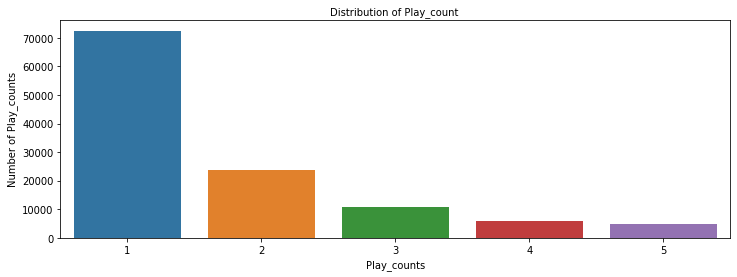

    •	As we can see, the most common value is 1 (~700K), then 2 and then 3, 4 and 5.
    •	We’re creating a data frame and calculating average play_count per song (avg_count)
    •	We can see user-song interaction distribution
 
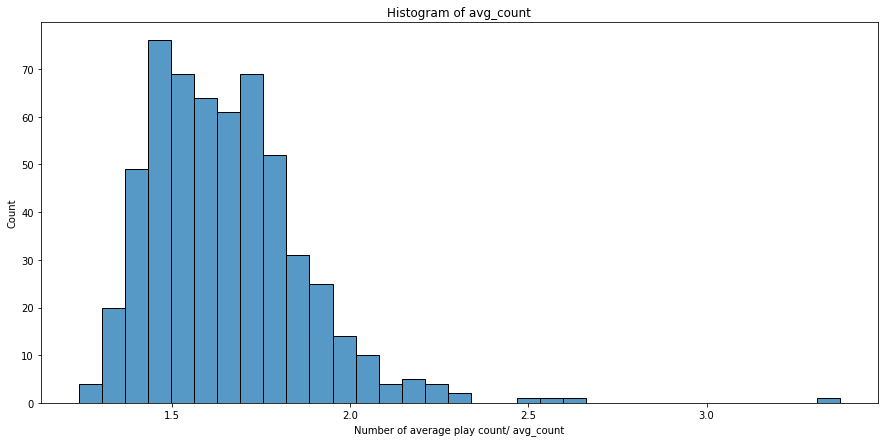

    •	The distribution is highly skewed to the right.
    •	It clearly shows that there are very few songs which have been played many times.
    •	Rank-based recommendation systems provide recommendations based on the most popular items (songs). This kind of recommendation system is useful when we have cold start problems. Cold start refers to the issue when we get a new user into the system and the machine is not able to recommend song to the new user, as the user did not have any historical interactions in the dataset. In those cases, we can use rank-based recommendation system to recommend song to the new user.
    •	To build the rank-based recommendation system, we take average of all the ratings/play_count provided to each song and then rank them based on their average rating / play_count.
 
 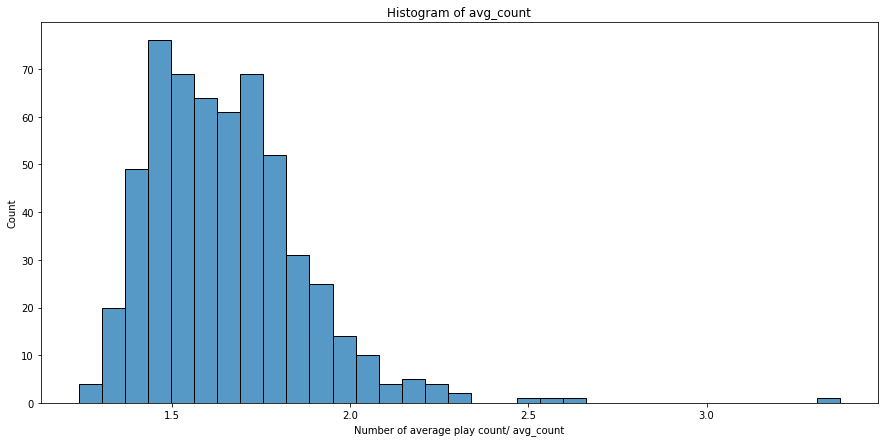

    •	I’ve created a function to find the top n songs for a recommendation based on the average play count of song. I also added a threshold for a minimum number of play_counts for a song to be considered for recommendation (threshold =1.5).

Terminology used in the report (and Python code):

    •	Relevant item - An item (song in this case) that is actually rated higher than the threshold rating (here 1.5) is relevant, if the actual rating is below the threshold then it is a non-relevant item. 
    •	Recommended item - An item that's predicted rating is higher than the threshold (here 1.5) is a recommended item, if the predicted rating (avg_count) is below the threshold then that song will not be recommended to the user.
    •	False Negative (FN) - It is the frequency of relevant items that are not recommended to the user. If the relevant items are not recommended to the user, then the user might not listen to the song. This would result in the loss of opportunity for the service provider which they would like to minimize.
    •	False Positive (FP) - It is the frequency of recommended items (songs) that are actually not relevant. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in loss of resources for the service provider which they would also like to minimize.
    •	Precision - It is the fraction of recommended items (songs) that are relevant actually i.e. if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.
    •	Recall - It is the fraction of actually relevant items (songs) that are recommended to the user i.e., if out of 10 relevant books, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.
    •	RMSE – Root Mean Square Error


- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Here are the techniques I’ve implemented
    1.	Popularity-based Recommendation System
    2.	Similarity Based Collaborative Filtering (user- user)
    3.	Similarity Based Collaborative Filtering (item-item)
    4.	Matrix Factorization
    5.	Cluster Based Recommendation System
    6.	Content Based Recommendation System

    •	As we can see from the results, the optimized models performed much better than the baseline ones.
    •	For all of the models Recall is much higher than Precision, meaning we’re much better recommending relevant songs than choosing relevant songs to be recommended (60-70% of songs that are recommended aren’t relevant).
    •	This can cost us a lot.
    •	Two models that got my attention are Optimized Model for Similarity Based Collaborative Filtering for User-User and Optimized Model for Collaborative Filtering Matrix Optimization. 
    •	Optimized Model for Similarity Based Collaborative Filtering for Item-Item also performs well.
    •	Looks like Optimized Matrix Factorization model has the lowest RMSE which means that the model fits data very well. 
    •	This model has also the best (highest) Precision (fraction of recommended items that are relevant actually) of all of the models.
    •	However, its Recall (fraction of actually relevant songs that are recommended to the user) isn’t the best, even though they’re pretty close to the best ones.
    •	Another good model is Optimized Model for Similarity Based Collaborative Filtering for User-User with best Recall of all of the researched models.
    •	Optimized Model for Similarity Based Collaborative Filtering for Item-Item is also a good model.

    •	We can also see an example prediction for a given user and song.
    •	It is interesting to note that depending on the model, we would either recommended a certain song to a user or not.
    •	Some models won’t even recommend a song even those it’s relevant (predicted value of avg_count < 1.5 while actual value = 2)

    •	I am not discussing F1 score since it’s a linear combination of Precision and Recall.
    •	I also looked at recommendations for each model and its corrected ratings. 
    •	Interesting enough, both models (User-user and Matrix Factorization) recommended different songs for the same user, however some of those songs were also recommended based on popularity-based model and cluster model.
    •	I’ll attach recommendations in appendix.


    •	For further improvements of the model, we can take a closer look to data preparation and more hyper parameters tuning.
    •	I would also investigate different values of threshold.
    •	I’ve noticed that choosing lower threshold, we might get better values of Precision and Recall (so also F1 Score), but then the model wouldn’t make much sense.


- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

       •	My proposition would be to adopt Optimized Model for Similarity Based Collaborative Filtering for User-User.
       •	This solution provides the best output in terms of evaluation values (Recall) and its Precision is just slightly worse performing than the other best model (Optimized Model for Collaborative Filtering Matrix Optimization)
       •	From the evaluation perspective, those two models perform in a very similar way.
       •	Optimized Model for Similarity Based Collaborative Filtering for User-User recommends more unique songs (meaning other models’ predictions didn’t overlap much) with higher corrected predicted ratings.
       •	Fact that matrix factorization’s predictions overlap with other predictions could lead us to use this model instead, however I’ll stick with Optimized Model for Similarity Based Collaborative Filtering for User-User.
